Rotate image using warp affine transform
========================================

In [1]:
import torch
import kornia
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# read the image with OpenCV
img: np.array = cv2.imread('../data/bennett_aden.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img)  # BxCxHxW

# create transformation (rotation)
alpha: float = 45.0  # in degrees
angle: torch.tensor = torch.ones(1) * alpha

In [4]:
# define the rotation center
center: torch.tensor = torch.ones(1, 2)
center[..., 0] = data.shape[3] / 2  # x
center[..., 1] = data.shape[2] / 2  # y

# define the scale factor
scale: torch.tensor = torch.ones(1)

In [5]:
# compute the transformation matrix
M: torch.tensor = kornia.get_rotation_matrix2d(center, angle, scale)

# apply the transformation to original image
_, _, h, w = data.shape
data_warped: torch.tensor = kornia.warp_affine(data.float(), M, dsize=(h, w))

# convert back to numpy
img_warped: np.array = kornia.tensor_to_image(data_warped.byte()[0])

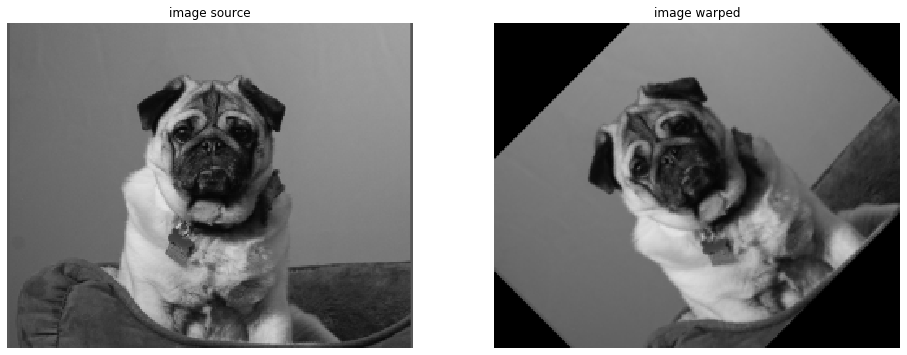

In [6]:
# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('image warped')
axs[1].imshow(img_warped)